In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import os
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import umap
import seaborn as sns

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
folder_path = r"C:\Users\tere1\OneDrive\Escritorio\TFM\datos_img"
# Cargar las características normalizadas por Z-score
df_color_z = pd.read_csv(os.path.join(folder_path, "features_color_all_zscore.csv"))
# Cargar las características normalizadas por Min-Max
df_color_mm = pd.read_csv(os.path.join(folder_path, "features_color_all_minmax.csv"))

In [4]:
df_color_z

,rgb_mean_r,rgb_mean_g,rgb_mean_b,hue,saturation,brightness,filename,label
0,-0.233010,-0.187437,0.459739,0.173814,-0.908055,-0.258016,callo_1.png,smaller
1,1.161184,1.758276,2.314469,3.173069,-2.630162,1.450514,callo_10.png,smaller
2,-0.077739,-0.327588,-0.860146,-0.718451,0.927561,-0.160670,callo_100.png,smaller
3,0.397788,0.356639,-0.399265,-0.373024,0.458052,0.338521,callo_101.png,smaller
4,-0.030227,0.228967,-0.358905,-0.064264,0.141367,-0.045647,callo_102.png,smaller
...,...,...,...,...,...,...,...,...
532,0.532051,0.649749,0.620998,0.893369,-0.410392,0.602273,callo_95.png,higher
533,-0.084669,-0.200543,-0.284272,0.014286,0.361934,-0.105928,callo_96.png,higher
534,0.012455,0.107445,0.180020,1.284708,-0.041958,0.114134,callo_97.png,higher
535,1.174102,1.542969,1.756730,2.768508,-1.294443,1.430725,callo_98.png,higher


In [5]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_color_z_cl= df_color_z.drop(columns=['filename', 'label'])

In [6]:
correlation_matrix = df_color_z_cl.corr()

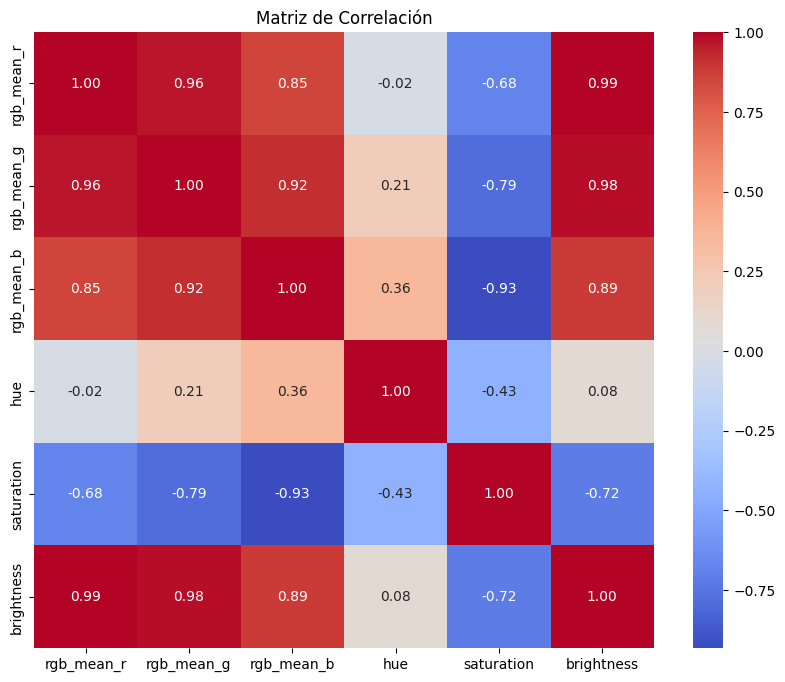

In [7]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

No consigo conseguir clusteres bien separados y repartidos ni con umap, después de ver la matriz de correlación veo que hay muchas variables correlacionadas, pruebo eliminar alguna como por ejemplo rgb_mean_r

In [8]:
df_color_z_cl= df_color_z_cl.drop(columns=['rgb_mean_r'])

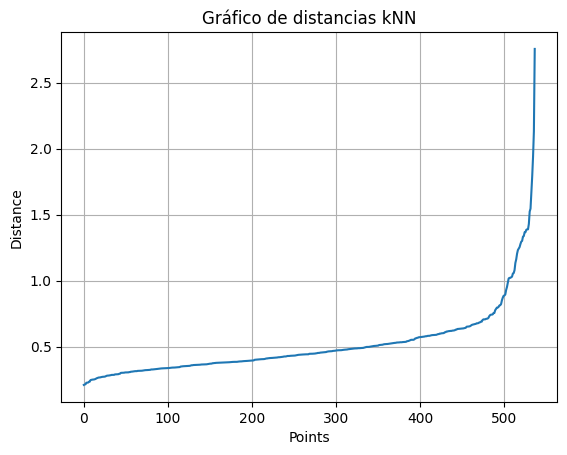

In [9]:
k = 5 #7
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_color_z_cl)
distances, indices = neighbors_fit.kneighbors(df_color_z_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()


In [10]:
X_color_z = np.array(df_color_z_cl)

clustering = DBSCAN(eps=0.6, min_samples=7).fit(X_color_z)

clustering.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,  0,  0, -1,  0,  0,
       -1, -1, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0, -1,  1,  0, -1,  0,  0,  0,  0,  0,  1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,
        0,  0,  0,  1,  0,  0,  0,  1,  0,  0, -1, -1,  0,  2,  2,  2,  0,
       -1,  0,  0,  0,  0,  0, -1, -1, -1,  1, -1, -1, -1,  0, -1, -1,  0,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0,  0, -1, -1, -1,
       -1,  0,  0, -1,  0

In [11]:
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 3
Número de puntos de ruido: 82


In [12]:
y_true = df_color_z['label'] 
y_pred = clustering.labels_     

contingency_table_z = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table_z)

Cluster DBSCAN  -1    0   1   2
Etiqueta Real                  
higher          28  233   2   5
smaller         54  204   8   3


UMAP:

In [34]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model = umap.UMAP(n_neighbors= 20, n_components=2,min_dist=0.01, random_state=42)  
X_umap = umap_model.fit_transform(X_color_z)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\tere1\AppData\Local\Temp\ipykernel_20880\2725202540.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


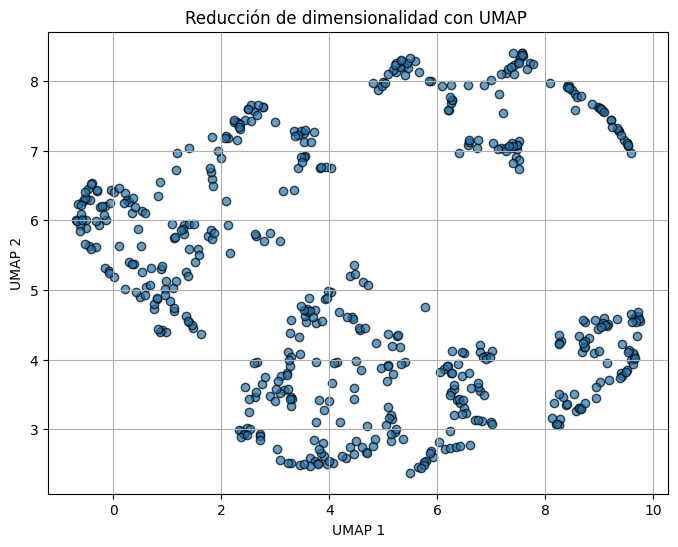

In [35]:
# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [197]:
clustering_umap_z = DBSCAN(eps=1, min_samples=15, metric = 'manhattan').fit(X_umap)
clustering_umap_z.labels_

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 3, 0, 1, 1, 1, 2, 2, 1, 2,
       3, 2, 0, 0, 0, 2, 0, 3, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 3, 3, 2, 0, 0, 3, 3, 0, 0, 0, 0, 3,
       0, 2, 3, 3, 3, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 3, 2, 0, 2, 0,
       0, 1, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 0, 0, 3, 3, 3, 1, 0, 2,
       0, 0, 2, 3, 0, 2, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 0, 2, 0,
       2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 3, 1, 2,
       1, 3, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 3, 3, 3, 1,
       1, 1, 0, 3, 1, 0, 3, 3, 1, 1, 3, 1, 3, 0, 3, 3, 1, 3, 0, 0, 3, 3,
       1, 3, 1, 2, 1, 0, 1, 1, 3, 3, 0, 0, 1, 3, 0, 0, 0, 3, 0, 1, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3, 0, 0, 0, 0, 2, 0, 1,
       1, 2, 1, 1, 2, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,

In [ ]:
labels = clustering_umap_z.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 4
Número de puntos de ruido: 0


In [199]:
y_true = df_color_z['label'] 
y_pred = clustering_umap_z.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN   0   1    2   3
Etiqueta Real                  
higher          98  47  101  22
smaller         96  58   67  48


In [200]:
#Los clusteres están bien dsitribuidos pero hay mezcla entre higher y smaller en ellos. Puede que el color no capture adecuadamente las diferencias entre smaller y higher.#

In [201]:
mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")


Silhouette Score (sin ruido): 0.530


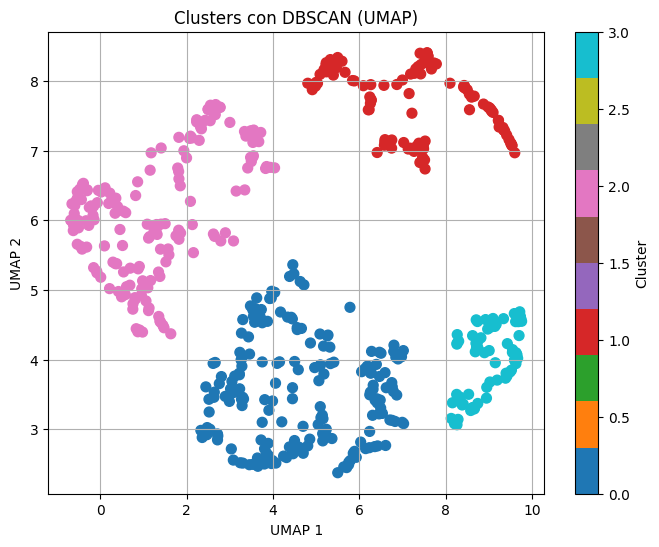

In [202]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='tab10', s=50)
plt.title("Clusters con DBSCAN (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

con normalizacion min max

In [203]:
#Se eliminan los datos no numéricos: 'label' y 'filename'
df_color_mm_cl= df_color_mm.drop(columns=['filename', 'label'])

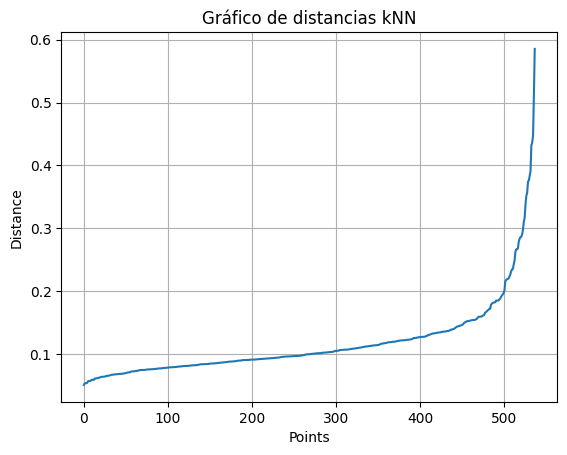

In [204]:
k = 9
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_color_mm_cl)
distances, indices = neighbors_fit.kneighbors(df_color_mm_cl)

distances = np.sort(distances[:, k - 1])  

plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title("Gráfico de distancias kNN")
plt.grid(True)
plt.show()


In [205]:
X_color_mm = np.array(df_color_mm_cl)

clustering = DBSCAN(eps=0.9, min_samples=8).fit(X_color_z)

clustering.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,
        0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0, -1,  0,
       -1, -1,  0, -1, -1, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0, -1,  0

In [206]:
labels = clustering.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 1
Número de puntos de ruido: 25


In [207]:
y_true = df_color_mm['label'] 
y_pred = clustering.labels_     

contingency_table_mm = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table_mm)

Cluster DBSCAN  -1    0
Etiqueta Real          
higher           3  265
smaller         22  247


umap:

In [268]:
# Aplicar UMAP con diferentes valores de n_neighbors
umap_model_mm = umap.UMAP(n_neighbors= 15, n_components=2,min_dist=0.01, random_state=42)  
X_umap_mm = umap_model_mm.fit_transform(X_color_mm)

c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\tere1\AppData\Local\Programs\Python\Python312\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


C:\Users\tere1\AppData\Local\Temp\ipykernel_20880\975549371.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)


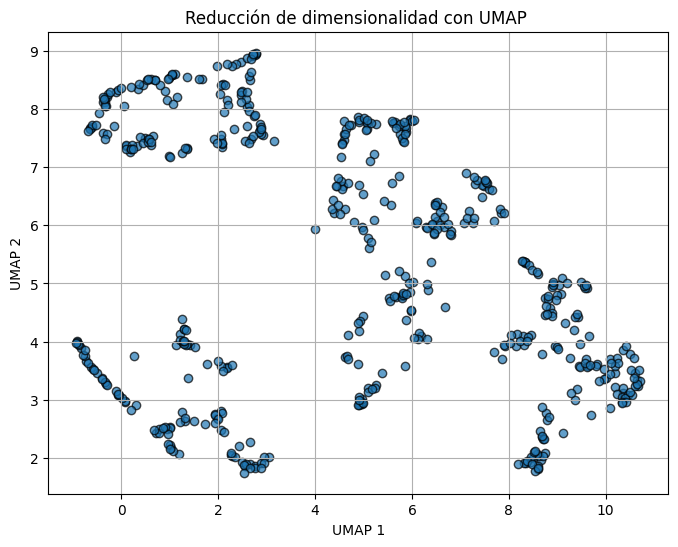

In [269]:
# Visualizar los resultados de UMAP
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], cmap='Spectral', edgecolor='k', alpha=0.7)
plt.title('Reducción de dimensionalidad con UMAP ')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.grid(True)
plt.show()

In [ ]:
clustering_umap_mm = DBSCAN(eps=1.1, min_samples=15, metric = 'manhattan').fit(X_umap_mm)
clustering_umap_mm.labels_

#clustering_umap_mm = DBSCAN(eps=0.9, min_samples=15).fit(X_umap_mm)   sale lo mismo
#clustering_umap_mm.labels_

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 3, 0, 1, 1, 1, 2, 0, 1, 2,
       3, 2, 0, 3, 0, 2, 0, 3, 0, 3, 2, 2, 1, 0, 0, 3, 0, 0, 0, 1, 2, 3,
       2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 3, 3, 2, 0, 0, 3, 3, 3, 0, 3, 3, 3,
       0, 0, 3, 3, 3, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 0, 3, 0, 0, 2, 3,
       0, 1, 3, 3, 3, 3, 0, 0, 0, 3, 3, 3, 2, 0, 0, 3, 0, 0, 3, 2, 0, 0,
       2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 3, 1, 0, 0, 3, 3, 3, 1, 0, 2,
       0, 0, 0, 3, 3, 2, 0, 0, 0, 3, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 2, 0,
       2, 3, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 3, 1, 2,
       1, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 2, 3, 3, 3, 3, 1,
       1, 1, 0, 3, 1, 0, 3, 3, 1, 1, 3, 1, 3, 0, 3, 3, 1, 3, 0, 3, 3, 3,
       1, 3, 1, 2, 1, 0, 1, 1, 3, 3, 3, 0, 1, 3, 3, 0, 0, 3, 3, 1, 0, 0,
       0, 2, 2, 0, 3, 0, 0, 0, 0, 2, 0, 0, 2, 0, 3, 0, 0, 0, 0, 2, 3, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2,
       0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2,

In [306]:
labels = clustering_umap_mm.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print(f"Número de clusters: {n_clusters}")
print(f"Número de puntos de ruido: {n_noise}")

Número de clusters: 4
Número de puntos de ruido: 0


In [307]:
y_true = df_color_mm['label'] 
y_pred = clustering_umap_mm.labels_     

contingency_table = pd.crosstab(y_true, y_pred, rownames=['Etiqueta Real'], colnames=['Cluster DBSCAN'])
print(contingency_table)

Cluster DBSCAN   0   1   2   3
Etiqueta Real                 
higher          80  47  86  55
smaller         87  58  52  72


In [308]:
mask = labels != -1  # Excluir puntos de ruido

if len(set(labels[mask])) > 1:
    silhouette = silhouette_score(X_umap_mm[mask], labels[mask])
    print(f"Silhouette Score (sin ruido): {silhouette:.3f}")
else:
    print("No hay suficientes clusters (sin contar ruido) para calcular la silueta.")

Silhouette Score (sin ruido): 0.578


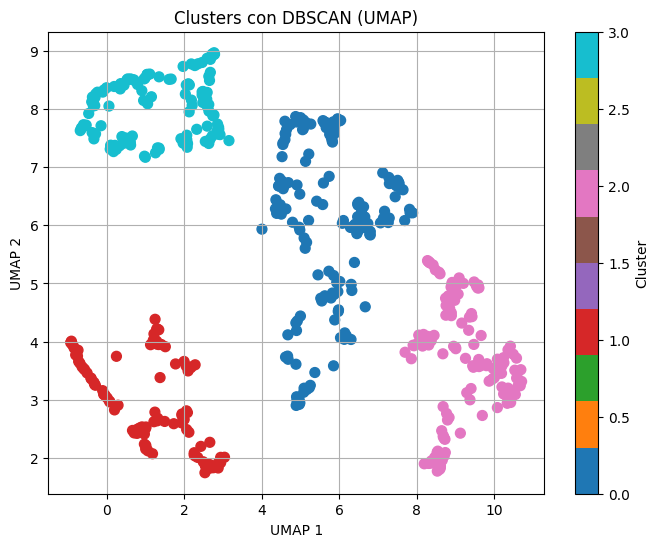

In [309]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap_mm[:, 0], X_umap_mm[:, 1], c=labels, cmap='tab10', s=50)
plt.title("Clusters con DBSCAN (UMAP)")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.colorbar(scatter, label="Cluster")
plt.grid(True)
plt.show()

Tantos los puntos de smaller como de higher se encuentran mezclados en todos los cluteres, y ninguno de estos grupos predomina en uno de ellos. Por tanto, los clusteres encontrados indican que hay grupos naturales en el espacio de características que se pueden diferenciar con el color, pero que no separan higher de smaller.

